In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

#### Set the path and global parameters.

In [23]:
ORIGIN_IM_PATH = 'basic/Image/original/'
ALIGNED_IM_PATH = 'basic/Image/aligned/'
LABEL_PATH = 'basic/EmoLabel/list_patition_label.txt'
label_dict = {
                1: 'Surprise',
                2: 'Fear',
                3: 'Disgust',
                4: 'Happiness',
                5: 'Sadness',
                6: 'Anger',
                7: 'Neutral'
              }
CLASS_NUM = len(label_dict.keys())

#### Load the Images and their related label, and make a statistic.

In [17]:
origin_im_list = os.listdir(ORIGIN_IM_PATH)
aligned_im_list = os.listdir(ALIGNED_IM_PATH)
im_dict = dict(train = dict(),test = dict())
match_error = False
with open(LABEL_PATH,'r') as label_file:
    label_lines = label_file.readlines()
    for line in label_lines:
        line = line.strip('\r\n').split(' ')
        im_name = line[0]
        aligned_im_name = im_name.strip('.jpg') + '_aligned.jpg'
        label = int(line[1])
        
        if not (im_name in origin_im_list and aligned_im_name in aligned_im_list):
            match_error = True
            print im_name, aligned_im_name
            break
            
        if 'train' in im_name:
            if label in im_dict['train'].keys():
                im_dict['train'][label].append(line[0])
            else:
                im_dict['train'][label] = [line[0]]
        elif 'test' in im_name:
            if label in im_dict['test'].keys():
                im_dict['test'][label].append(line[0])
            else:
                im_dict['test'][label] = [line[0]]

train_size = sum([len(im_dict['train'][i]) for i in im_dict['train'].keys()])
test_size = sum([len(im_dict['test'][i]) for i in im_dict['test'].keys()])
data_size = train_size + test_size

if len(origin_im_list) != data_size or len(aligned_im_list) != data_size or match_error:
    print 'Error! Images and labels do not match!'
elif im_dict['train'].keys() != im_dict['test'].keys():
    print 'Error! Training labels and test labels do not match!'
else:
    print 'Images and labels match successfully!'
    
print ''
print 'Data Size: %d'%data_size
print 'Training Data Size: %d'%train_size
print 'Test Data Size: %d'%test_size
print ''

for label in im_dict['train']:
    class_train_size = len(im_dict['train'][label])
    class_test_size = len(im_dict['test'][label])
    class_size = class_train_size + class_test_size
    print 'Class %s (%s) size: %d'%(label,label_dict[label],class_size)
    print '\tTraining: %d\tTest: %d'%(class_train_size,class_test_size)
    
with open('im_dict.pickle','wb') as im_dict_file:
    pickle.dump(im_dict,im_dict_file)

Images and labels match successfully!

Data Size: 15339
Training Data Size: 12271
Test Data Size: 3068

Class 1 (Surprise) size: 1619
	Training: 1290	Test: 329
Class 2 (Fear) size: 355
	Training: 281	Test: 74
Class 3 (Disgust) size: 877
	Training: 717	Test: 160
Class 4 (Happiness) size: 5957
	Training: 4772	Test: 1185
Class 5 (Sadness) size: 2460
	Training: 1982	Test: 478
Class 6 (Anger) size: 867
	Training: 705	Test: 162
Class 7 (Neutral) size: 3204
	Training: 2524	Test: 680


#### Show the image size and some examples.

Aligned Image size:  (100, 100, 3)

Original Examples:


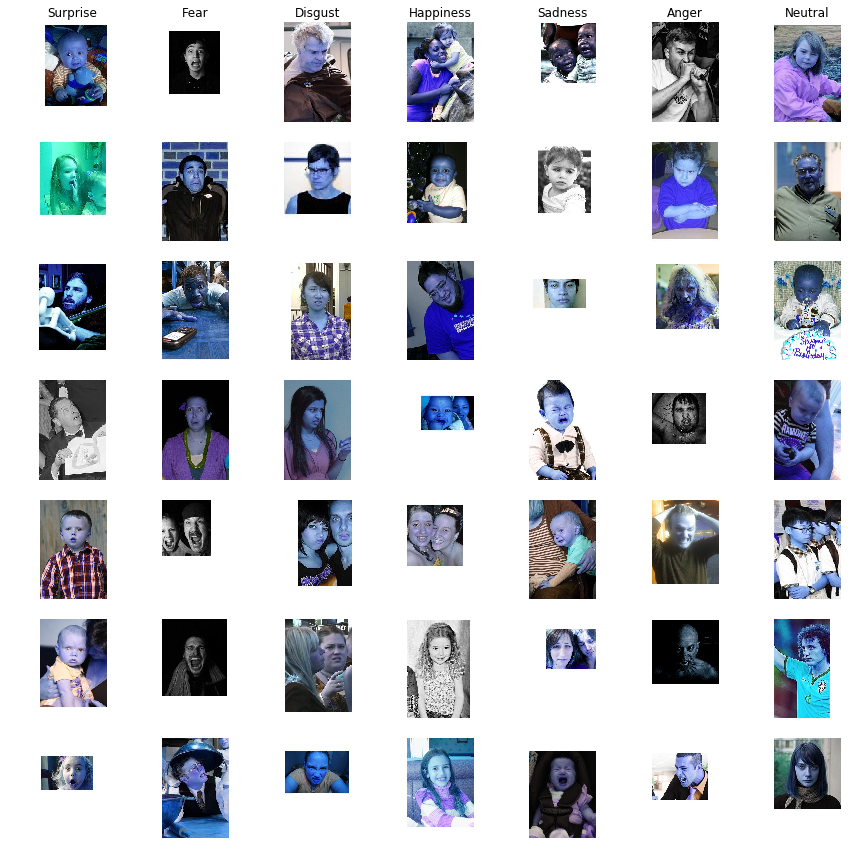


Aligned Examples:


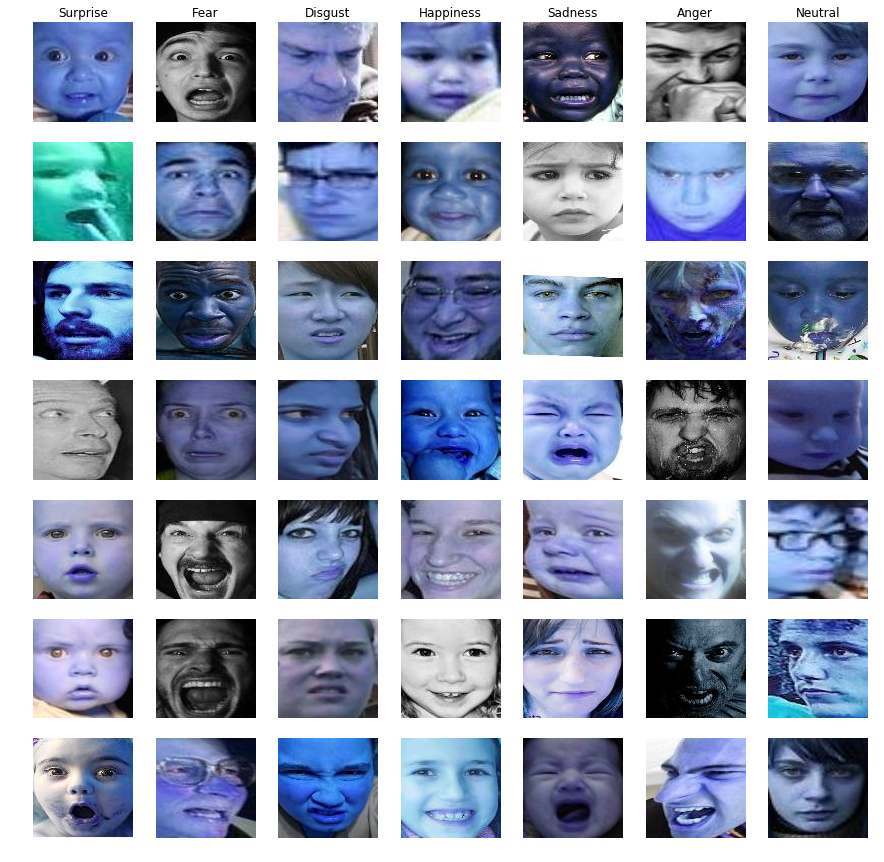

In [38]:
image_size = cv2.imread(ALIGNED_IM_PATH + aligned_im_list[0]).shape
print 'Aligned Image size: ',image_size
print ''

samples_per_class = 7
Selected_images = dict()
print 'Original Examples:'
plt.figure(figsize=(15,15))
for label_index,label in enumerate(label_dict.keys()):
    selected_image = np.random.choice(im_dict['train'][label], samples_per_class, replace=False)
    Selected_images[label] = selected_image
    for line_index, image_name in enumerate(selected_image):
        plt_index = line_index * CLASS_NUM + label_index + 1
        plt.subplot(samples_per_class, CLASS_NUM, plt_index)
        image = cv2.imread(ORIGIN_IM_PATH + image_name)
        plt.imshow(image.astype('uint8'))
        plt.axis('off')
        if line_index == 0:
            plt.title(label_dict[label])
plt.show()
print ''

print 'Aligned Examples:'
plt.figure(figsize=(15,15))
for label_index,label in enumerate(label_dict.keys()):
    selected_image = Selected_images[label]
    for line_index, image_name in enumerate(selected_image):
        plt_index = line_index * CLASS_NUM + label_index + 1
        plt.subplot(samples_per_class, CLASS_NUM, plt_index)
        image_name = image_name.strip('.jpg') + '_aligned.jpg'
        image = cv2.imread(ALIGNED_IM_PATH + image_name)
        plt.imshow(image.astype('uint8'))
        plt.axis('off')
        if line_index == 0:
            plt.title(label_dict[label])
plt.show()

#### Transform the aligned images into arrays and save them.

In [42]:
if not os.path.exists('Data_Arrays/'):
    os.system('mkdir Data_Arrays/')
for kind in ['Train','Test']:
    print kind + ':'
    kind = kind.lower()
    if not os.path.exists('Data_Arrays/' + kind):
        os.system('mkdir Data_Arrays/' + kind)
    for label in im_dict[kind].keys():
        if not os.path.exists('Data_Arrays/' + kind + '/' + label_dict[label]):
            os.system('mkdir Data_Arrays/' + kind + '/' + label_dict[label])
        save_path = 'Data_Arrays/' + kind + '/' + label_dict[label] + '/'
        array_num = 0
        for image_name in im_dict[kind][label]:
            image_name = image_name.strip('.jpg') + '_aligned.jpg'
            array_name = image_name.strip('.jpg')
            array = cv2.imread(ALIGNED_IM_PATH + image_name)
            np.save(save_path + array_name,array)
            array_num += 1
        print '%s: %d arrays saved'%(label_dict[label],array_num)
    print ''

Train:
Surprise: 1290 arrays saved
Fear: 281 arrays saved
Disgust: 717 arrays saved
Happiness: 4772 arrays saved
Sadness: 1982 arrays saved
Anger: 705 arrays saved
Neutral: 2524 arrays saved

Test:
Surprise: 329 arrays saved
Fear: 74 arrays saved
Disgust: 160 arrays saved
Happiness: 1185 arrays saved
Sadness: 478 arrays saved
Anger: 162 arrays saved
Neutral: 680 arrays saved



#### Get the means of the Images.

In [48]:
if not os.path.exists('Data_Means/'):
    os.system('mkdir Data_Means/')
for kind in ['Train','Test']:
    print kind + ':'
    kind = kind.lower()
    if not os.path.exists('Data_Means/' + kind):
        os.system('mkdir Data_Means/' + kind)
    for label in im_dict[kind].keys():
        array_path = 'Data_Arrays/' + kind + '/' + label_dict[label] + '/'
        array_list = os.listdir(array_path)
        array_mean = np.zeros(image_size)
        array_num = 0
        for array_name in array_list:
            array_num += 1
            array = np.load(array_path + array_name)
            array_mean = array_mean*(array_num - 1)/array_num + array/array_num
            np.save('Data_Means/' + kind + '/' + label_dict[label],array_mean)
        print '%s: %d arrays loaded'%(label_dict[label],array_num)
    print ''

Train:
Surprise: 1290 arrays loaded
Fear: 281 arrays loaded
Disgust: 717 arrays loaded
Happiness: 4772 arrays loaded
Sadness: 1982 arrays loaded
Anger: 705 arrays loaded
Neutral: 2524 arrays loaded

Test:
Surprise: 329 arrays loaded
Fear: 74 arrays loaded
Disgust: 160 arrays loaded
Happiness: 1185 arrays loaded
Sadness: 478 arrays loaded
Anger: 162 arrays loaded
Neutral: 680 arrays loaded



#### Plot the mean of the arrays.

Train:


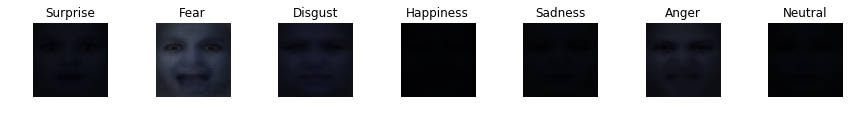

Test:


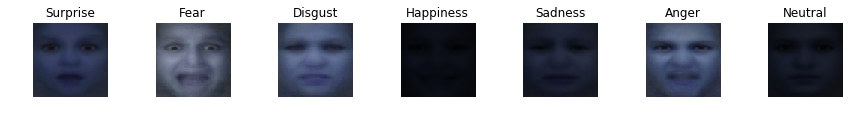

In [62]:
print 'Train:'
plt.figure(1,figsize=(15,3))
for label_index,label in enumerate(label_dict.keys()):
    ### training arrays
    plt_index = label_index + 1
    plt.subplot(2, CLASS_NUM, plt_index)
    mean_array = np.load('Data_Means/train/' + label_dict[label] + '.npy')
    plt.imshow(mean_array.astype('uint8'))
    plt.axis('off')
    plt.title(label_dict[label])
plt.show()

print 'Test:'
plt.figure(2,figsize=(15,3))
for label_index,label in enumerate(label_dict.keys()):   
    ### test arrays
    plt_index = CLASS_NUM + label_index + 1
    plt.subplot(2, CLASS_NUM, plt_index)
    mean_array = np.load('Data_Means/test/' + label_dict[label] + '.npy')
    plt.imshow(mean_array.astype('uint8'))
    plt.axis('off')
    plt.title(label_dict[label])
plt.show()